## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#number of unique users
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == "1"')['user_id'].count()/df['user_id'].count()

0.11965919355605512

In [6]:
df.query('converted == "1"')['user_id'].count()/df['user_id'].count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
#the number of user with new_page and control
df_new = df[df['landing_page'] =="new_page"][df['group']=='control']['user_id'].count()

#the number of user with treatement and old_page
df_treat = df[df['group'] == "treatment"][df['landing_page'] =="old_page"]['user_id'].count()

print(df_new + df_treat)

3893


C:\Ji\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Ji\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [42]:
#remain only (treatment and new_page group) + (control and old_page group) 
df_tre = df[df['group'] == "treatment"][df['landing_page'] == 'new_page']
df_con = df[df['group'] == 'control'][df['landing_page'] == 'old_page']

#filtered dataframe
df2 = pd.concat([df_tre, df_con])
df2.head()

C:\Ji\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Ji\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [43]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [44]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [45]:
# find the repeated user_id by sorting orders
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [46]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [47]:
df2_new = df2.drop(index = 1899)
df2_new.query('user_id == "773192"')
df2 = df2_new
#df2 is the dataframe with removing duplicated user_id

In [48]:
#check the duplicated case
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [49]:
#the probaility of users who make conversion
df2_convert = df2.query('converted == "1"')
df2_convert['user_id'].count()/df2['user_id'].count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [50]:
#the probability of users with making conversion in control group, old_page
df2_convert.query('group == "control"')['user_id'].count()/df2.query('group == "control"')['user_id'].count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [51]:
#the probability of users with making conversion in treatment group, new_page
df2_convert.query('group == "treatment"')['user_id'].count()/df2.query('group == "treatment"')['user_id'].count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [52]:
#the chance of getting new pages
df2.query('landing_page == "new_page"')['user_id'].count()/df2['user_id'].count()

0.5000619442226688

In [53]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Almost half of candidates received new_page and 12% among them changed to the old page. Also around 12% of users who received old_page changed to the new page. Therefore, this is not a sufficient evidence that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0 : Pnew - Pold <= 0**

**H1 : Pnew - Pold > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
#the probability of users who received new_page converts to old_page
Pnew = df2.query('landing_page == "new_page"')
Pnew_converted = Pnew.query('converted == "1"')
Pnew_rate = Pnew_converted['user_id'].count()/Pnew['user_id'].count()
print("the probability of conversion of new page :", Pnew_rate)

the probability of conversion of new page : 0.11880806551510564


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
#the probability of users who received new_page converts to new_page
Pold = df2.query('landing_page == "old_page"')
Pold_converted = Pold.query('converted == "1"')
Pold_rate= Pold_converted['user_id'].count()/Pold['user_id'].count()
print("the probability of conversion of new page :", Pold_rate)

the probability of conversion of new page : 0.1203863045004612


**Since the above statement said $Pnew = Pold$, I need to find out the mean of two and I am going to use this value.** 

In [24]:
#The average of Pnew and Pold is going to define as Pmean
Pmean = (Pnew_rate+Pold_rate) / 2
print("Pnew = Pold =", Pmean)

Pnew = Pold = 0.11959718500778342


c. What is $n_{new}$?

In [25]:
Nnew = Pnew.shape[0]
print("Nnew :", Nnew)

Nnew : 145310


d. What is $n_{old}$?

In [26]:
Nold = Pold.shape[0]
print("Nold :", Nold)

Nold : 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([1,0], size = Nnew, p = [Pmean, (1-Pmean)])
new_page_converted.mean()

0.11881494735393297

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([1,0], size = Nold, p = [Pmean, (1-Pmean)])
old_page_converted.mean()

0.1194639095777634

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
new_page_converted.mean() - old_page_converted.mean()

-0.0006489622238304293

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
#Make the histogram as 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = Nnew, p=[Pmean, (1-Pmean)])
    old_page_converted = np.random.choice([1,0], size = Nold, p=[Pmean, (1-Pmean)])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

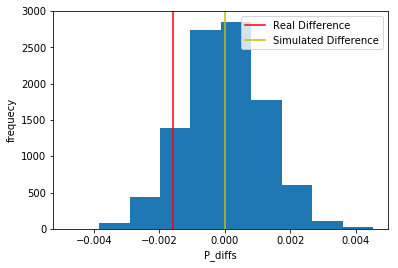

In [31]:
plt.hist(p_diffs);
plt.axvline(x=(Pnew_rate-Pold_rate), color = 'r', label = "Real Difference");
plt.axvline(x=(np.array(p_diffs).mean()), color = 'y', label = "Simulated Difference");
plt.xlabel('P_diffs')
plt.ylabel('frequecy')
plt.legend()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
actual_diff = Pnew_rate -Pold_rate

In [33]:
greater_than_actual = 0
for i in p_diffs:
    if i > actual_diff:
        greater_than_actual += 1
print(greater_than_actual)

9059


In [34]:
print("The actual difference between Pnew and Pold :" ,actual_diff)
rate_p_diffs = greater_than_actual / len(p_diffs)
print("The proportion in p_diffs greater than actual difference : ", rate_p_diffs)

The actual difference between Pnew and Pold : -0.0015782389853555567
The proportion in p_diffs greater than actual difference :  0.9059


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**0.9066 is P-value for this study. If the calculated P-value is greater than 0.05, the null hypothesis is not rejected. In other words, new page is equal or even worse rather than old version page. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = len(df2[df2['landing_page'] == "old_page"][df2['converted'] == 1])
convert_new = len(df2[df2['landing_page'] == "new_page"][df2['converted'] == 1])
n_old = Nold
n_new = Nnew

print("convert_old: ", convert_old)
print("convert_new: ", convert_new)
print("n_old: ", Nold)
print("n_new: ", Nnew)

convert_old:  17489
convert_new:  17264
n_old:  145274
n_new:  145310


C:\Ji\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Ji\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest(count = [convert_new, convert_old], 
                                              nobs = [n_new, n_old] )
print("z_score: ", z_score)
print("p_value: ", p_value)

z_score:  -1.3109241984234394
p_value:  0.18988337448195103


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z_score is -1.31 which means the elements are less than normal mean. Though after making the standard normal distribution, the p value is higher than 0.05,  so I cannot reject the null hypothesis. I need to accept the new page is worse or equal to the old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression since there are two categories; conversion or no conversion**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [56]:
#Make a copy of df2 as df_abtest
df_abtest = df2.copy()
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [58]:
df_abtest['intercept'] = 1

In [59]:
df_abtest.head()

,user_id,timestamp,group,landing_page,converted,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1


In [60]:
df_abtest[['control','treatment']] = pd.get_dummies(df_abtest['group'])
#Drop the control column
df_abtest = df_abtest.drop('control', axis = 1)


In [61]:
#Change the name of treatment column as ab_page to represent group column as number.
df_abtest = df_abtest.rename(columns = {"treatment":"ab_page"})
df_abtest.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [63]:
logit_mod = sm.Logit(df_abtest['converted'], df_abtest[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        12:20:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Since p-value is 0.19 and it is higher than alpha value, 0.05, we cannot reject null hypothesis; new page is worse or equal to the old page. This conclusion is same as Part II's conclusion.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**I have to consider other factors since there can exist some bias; change aversion and novelty effect. Age, sexuality, where they live, what device they use and etc can be affected. The disadvantage of considering additional features in my regression model makes the summary more complex and becomes confusing to read. **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [65]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [66]:
df_new_nation = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new_nation.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [67]:
### Create the necessary dummy variables
df_new_nation1 = pd.get_dummies(df_new_nation['country']) 
df_new_nation1.head()

,CA,UK,US
user_id,,,
834778,0,1,0
928468,0,0,1
822059,0,1,0
711597,0,1,0
710616,0,1,0


In [68]:
df_new_nation = df_new_nation.join(df_new_nation1)
df_new_nation.head()

,country,timestamp,group,landing_page,converted,CA,UK,US
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [70]:
### Fit Your Linear Model And Obtain the Results
df_new_nation['intercept'] = 1
logit_mod = sm.Logit(df_new_nation['converted'], df_new_nation[['intercept','CA','US']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 19 Mar 2019   Pseudo R-squ.:               1.521e-05
Time:                        12:23:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

In [71]:
np.exp(-0.0507), np.exp(-0.0099)

(0.9505637969004034, 0.9901488436829572)

In [72]:
1/np.exp(-0.0507), 1/np.exp(-0.0099)

(1.052007243765014, 1.009949167117542)

**Conclusion**


The Canada users are more likely 0.95 times converting the page and US users are  0.99 times more converting. In addition, the reciprocal value are almost one so countries do not affect on the converting pages.   

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.